Problem Statement:
    Predicting percentage of scores based on hours studied using linear regression as the data contains only two variables and based on the relationship between them.
    

In [241]:
#Importing required libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [242]:
#Reading Data into dataframe
student_df=pd.read_csv(r'C:\Users\STEPHEN VARGHESE\Downloads\student_df.csv')

In [243]:
#Lets See the dataframe
student_df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [244]:
#Size of Dataframe
student_df.shape

(25, 2)

In [245]:
#Checking the data quality for nulls and datatype
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 440.0 bytes


In [246]:
student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#Visualizing the data in graphical form
sns.pairplot(student_df)

In [ ]:
sns.pairplot(student_df,x_vars='Hours',y_vars='Scores')

In [ ]:
plt.figure(figsize = (5, 5))
sns.heatmap(student_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Model building

In [247]:
#Since we could see a lot of difference in the range between the variables , this may result in wrong model prediction as one of them will be treated s outlier 
#Hence we will scale the variables for better prediction and efficient processing 
X = student_df.iloc[:,:-1]
y = student_df.iloc[:,-1]

In [248]:
from sklearn.preprocessing import StandardScaler

In [249]:
# Create dependent and independent variables

# Split data in test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.head()

,Hours
22,3.8
17,1.9
24,7.8
23,6.9
14,1.1


In [250]:
# Scale independent test variables
X_test.head()

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


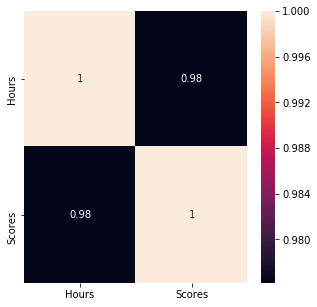

In [251]:
#Lets visualize the correlations after scaling
plt.figure(figsize = (5, 5))
sns.heatmap(student_df.corr(), annot = True)
plt.show()

In [252]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [253]:
y_predicted=lm.predict(X_test)
print(y_predicted)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [254]:
#Coefficient and intercept
print('Coefficients:',lm.coef_)
print('Intercept:',lm.intercept_)

Coefficients: [9.91065648]
Intercept: 2.018160041434662


In [255]:
Eval=pd.DataFrame({'Predicted':y_predicted,'Actual':y_test})
print(Eval)

    Predicted  Actual
5   16.884145      20
2   33.732261      27
19  75.357018      69
16  26.794801      30
11  60.491033      62


In [256]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [257]:
#MSE-  Mean Square Error is an absolute measure of the goodness for the fit.
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_predicted))

21.598769307217456


In [258]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
print("Score for students having 9.5hrs/day is",lm.predict([[9.25]])[0])

Score for students having 9.5hrs/day is 93.69173248737539
